In [1]:
import numpy as np
import pandas as pd
import datetime

In [2]:
import pandas as pd
from pandas import DataFrame
import dateutil.parser
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
from preprocess import train_test_split
from preprocess import n_series

In [3]:
df = pd.read_csv("4200_C005_2019_03_03.tsv", sep=',', header=None)
df.columns = ["kunag", "matnr", "date", "quantity","price"]

In [4]:
import numpy as np
import pandas as pd
import datetime


def n_series(input_df,kunag,matnr):
    input_df = input_df[input_df["quantity"] >=0]    
    df = input_df.copy()
    n_df1 = df[(df["kunag"] == kunag) & (df["matnr"] == matnr)]
    n_df1.date = n_df1.date.apply(lambda x : pd.to_datetime(x,format = '%Y%m%d', errors='ignore'))
    n_df1 = n_df1.sort_values('date')
    n_df1.set_index('date',inplace=True)
    weekly_resampled_data = n_df1.quantity.resample('W').sum() 
    weekly_resampled_data = weekly_resampled_data.replace(np.nan, 0)
    individual_series = weekly_resampled_data.to_frame() 
    individual_series = individual_series.reset_index()
    return individual_series


def train_test_split(input_df,kunag,matnr,i):
    data= n_series(input_df,kunag,matnr)
    train = data.iloc[0:-i]    
    test = data.iloc[-i:-1]
    return train,test

In [5]:
from pandas import Series
from matplotlib import pyplot
from pandas.tools.plotting import lag_plot
df1 = n_series(df,500056565, 100278)
# df1 = df1.set_index('date',inplace=True)
# df1
# lag_plot(series)
# pyplot.show()

/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [6]:
df1.set_index("date",inplace = True)

In [7]:
df1.head()

,quantity
date,
2016-07-24,1.0
2016-07-31,1.0
2016-08-07,0.0
2016-08-14,0.0
2016-08-21,0.0


In [ ]:

from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(df1)
pyplot.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df1, lags=30)
pyplot.show()

In [ ]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

In [ ]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
X = df1.values
train, test = X[1:len(X)-16], X[len(X)-16:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
m = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.1)
m.fit(daily_train)
future = m.make_future_dataframe(periods=213)
forecast = m.predict(future)

In [ ]:
m.plot_components(forecast)

In [ ]:
fit2 = SimpleExpSmoothing(np.asarray(train['quantity'])).fit(smoothing_level=0.6,optimized=False)
        y_hat_avg['SES'] = fit2.forecast(len(test1))

In [11]:
from fbprophet import Prophet
def prophet(input_df,kunag,matnr,n):
    i = 0
    lst = []
    test1 = train_test_split(df,kunag,matnr,n)[1]
    y_hat = test1.copy()
    for i in range(16,1,-1):
        train,test = train_test_split(df,kunag,matnr,i)
        train = train.rename(columns = {"date": "ds","quantity":"y"}) 
        m = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.1)
        y_hat['naive'] =m.fit(train)
        future = m.make_future_dataframe(periods=7)
        pred = m.predict(future)
        pred = y_hat['naive']
        lst.append(pred.iloc[0])   
    pd.DataFrame(lst)
    y_hat['pred_column']=lst
    plt.figure(figsize=(12,8))
#     plt.plot( train.set_index("date")['quantity'], label='Train')
#     plt.plot(test.set_index("date")['quantity'], label='Test')
#     plt.plot(y_hat.set_index("date")['pred_column'], label='Naive Forecast')
#     plt.legend(loc='best')
#     plt.title("Naive Forecast")
#     plt.show()
    rms = sqrt(mean_squared_error(test1.quantity, y_hat.pred_column))
    print("rms = ", rms)
    del y_hat['naive']
    return y_hat

In [12]:
# m = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.1)
# m.fit(df_p)
# future = m.make_future_dataframe(periods=60)
# forecast = m.predict(future)

In [13]:
prophet(df,500056565, 100278,16)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

TypeError: float() argument must be a string or a number, not 'Prophet'

<Figure size 864x576 with 0 Axes>

In [13]:
def n_series(input_df,kunag,matnr):
    input_df = input_df[input_df["quantity"] >=0]    
    df = input_df.copy()
    n_df1 = df[(df["kunag"] == kunag) & (df["matnr"] == matnr)]
    n_df1.date = n_df1.date.apply(lambda x : pd.to_datetime(x,format = '%Y%m%d', errors='ignore'))
    n_df1 = n_df1.sort_values('date')
    n_df1.set_index('date',inplace=True)
    weekly_resampled_data = n_df1.quantity.resample('W').sum() 
    weekly_resampled_data = weekly_resampled_data.replace(np.nan, 0)
    individual_series = weekly_resampled_data.to_frame() 
    individual_series = individual_series.reset_index()
    return individual_series

In [24]:
df_p = n_series(df,500056565, 100278)
df_p.head()

,date,quantity
0,2016-07-24,1.0
1,2016-07-31,1.0
2,2016-08-07,0.0
3,2016-08-14,0.0
4,2016-08-21,0.0


In [25]:
df_p = df_p.rename(columns = {"date": "ds","quantity":"y"}) 
df_p

,ds,y
0,2016-07-24,1.0
1,2016-07-31,1.0
2,2016-08-07,0.0
3,2016-08-14,0.0
4,2016-08-21,0.0
5,2016-08-28,1.0
6,2016-09-04,0.0
7,2016-09-11,0.0
8,2016-09-18,0.0
9,2016-09-25,0.0


In [33]:
m = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.1)
m.fit(df_p)
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


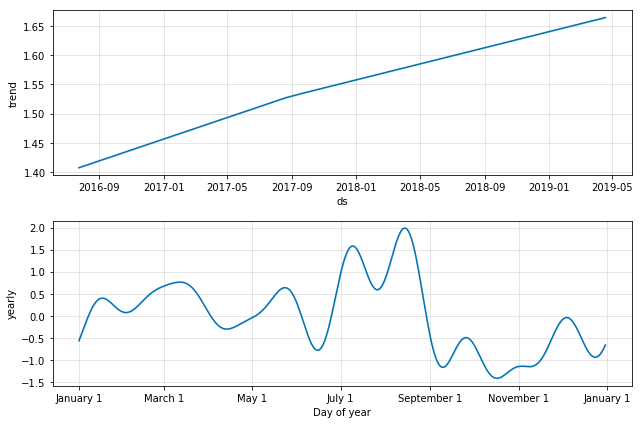

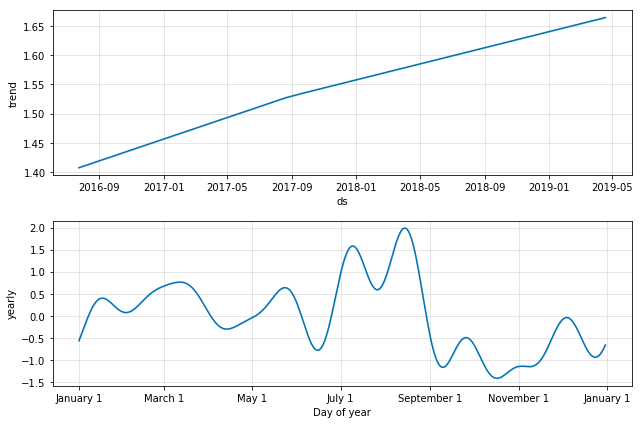

In [34]:
m.plot_components(forecast)

In [ ]:
m = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.1)
m.fit(daily_train)
future = m.make_future_dataframe(periods=213)
forecast = m.predict(future)

In [ ]:
def naive(input_df,kunag,matnr,n):
    i = 0
    lst = []
    test1 = train_test_split(df,kunag,matnr,n)[1]
    y_hat = test1.copy()

    for i in range(16,1,-1):
        train,test = train_test_split(df,kunag,matnr,i)
        dd= np.asarray(train["quantity"])
        y_hat['naive'] = int(dd[len(dd)-1])
        pred = y_hat['naive']
        lst.append(pred.iloc[0])

    
    pd.DataFrame(lst)
    y_hat['pred_column']=lst
    plt.figure(figsize=(12,8))
    plt.plot( train.set_index("date")['quantity'], label='Train')
    plt.plot(test.set_index("date")['quantity'], label='Test')
    plt.plot(y_hat.set_index("date")['pred_column'], label='Naive Forecast')
    plt.legend(loc='best')
    plt.title("Naive Forecast")
    plt.show()
    rms = sqrt(mean_squared_error(test1.quantity, y_hat.pred_column))
    print("rms = ", rms)
    del y_hat['naive']
    return y_hat

In [ ]:
naive(df,500056565, 100278,16)

In [ ]:
def average_forecast(input_df,kunag,matnr,n):
    i = 0
    lst = []
    test1 = train_test_split(df,kunag,matnr,n)[1]
    y_hat_avg = test1.copy()
    for i in range(16,1,-1):
        train,test = train_test_split(df,kunag,matnr,i)
        dd= np.asarray(train["quantity"])
        y_hat_avg['avg_forecast'] = train['quantity'].mean()
        pred = y_hat_avg['avg_forecast']
        lst.append(pred.iloc[0])

    pd.DataFrame(lst)
    y_hat_avg['pred_column']=lst
    plt.figure(figsize=(12,8))
    plt.plot( train.set_index("date")['quantity'], label='Train')
    plt.plot(test.set_index("date")['quantity'], label='Test')
    plt.plot(y_hat_avg.set_index("date")['pred_column'], label='Average Forecast')
    plt.legend(loc='best')
    plt.title("Average forecast")
    plt.show()
    rms = sqrt(mean_squared_error(test1.quantity, y_hat_avg.pred_column))
    print("rms = ", rms)
    del y_hat_avg['avg_forecast']
    return y_hat_avg

        

In [ ]:
average_forecast(df,500056565, 100278,16)

In [ ]:
def moving_average(input_df, kunag,matnr,n):
    i = 0
    lst = []
    test1 = train_test_split(df,kunag,matnr,n)[1]
    y_hat_avg = test1.copy()
    for i in range(16,1,-1):
        train,test = train_test_split(df,kunag,matnr,i)
        dd= np.asarray(train["quantity"])
        y_hat_avg['moving_avg_forecast'] = train['quantity'].rolling(3).mean().iloc[-1]
        pred = y_hat_avg['moving_avg_forecast']
        lst.append(pred.iloc[0])

    pd.DataFrame(lst)
    y_hat_avg['pred_column']=lst
    plt.figure(figsize=(12,8))
    plt.plot( train.set_index("date")['quantity'], label='Train')
    plt.plot(test.set_index("date")['quantity'], label='Test')
    plt.plot(y_hat_avg.set_index("date")['pred_column'], label='moving_avg_forecast')
    plt.legend(loc='best')
    plt.title("moving_avg_forecast")
    plt.show()
    rms = sqrt(mean_squared_error(test1.quantity, y_hat_avg.pred_column))
    print("rms = ", rms)
    del y_hat_avg['moving_avg_forecast']
    return y_hat_avg

In [ ]:
moving_average(df,500056565, 100278,16)

In [ ]:
def ses(input_df, kunag,matnr,n):
    i = 0
    lst = []
    test1 = train_test_split(df,kunag,matnr,n)[1]
    y_hat_avg = test1.copy()
    for i in range(n,1,-1):
        train,test = train_test_split(df,kunag,matnr,i)
        dd= np.asarray(train["quantity"])
        fit2 = SimpleExpSmoothing(np.asarray(train['quantity'])).fit(smoothing_level=0.6,optimized=False)
        y_hat_avg['SES'] = fit2.forecast(len(test1))
        pred = y_hat_avg['SES']
        lst.append(pred.iloc[0])

    pd.DataFrame(lst)
    y_hat_avg['pred_column']=lst
    plt.figure(figsize=(12,8))
    plt.plot( train.set_index("date")['quantity'], label='Train')
    plt.plot(test.set_index("date")['quantity'], label='Test')
    plt.plot(y_hat_avg.set_index("date")['pred_column'], label='SES')
    plt.legend(loc='best')
    plt.title("SES")
    plt.show()
    rms = sqrt(mean_squared_error(test1.quantity, y_hat_avg.pred_column))
    print("rms = ", rms)
    del y_hat_avg['SES']
    return y_hat_avg

In [ ]:
ses(df,500056565, 100278,16)

In [ ]:
def holts_linear(input_df, kunag,matnr,n):
    i = 0
    lst = []
    test1 = train_test_split(df,kunag,matnr,n)[1]
    y_hat_avg = test1.copy()
    for i in range(16,1,-1):
        train,test = train_test_split(df,kunag,matnr,i)
        dd= np.asarray(train["quantity"])
        fit1 = Holt(np.asarray(train['quantity'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
        y_hat_avg['Holt_linear'] = fit1.forecast(len(test1))
        pred = y_hat_avg['Holt_linear']
        lst.append(pred.iloc[0])

    pd.DataFrame(lst)
    y_hat_avg['pred_column']=lst
    plt.figure(figsize=(12,8))
    plt.plot( train.set_index("date")['quantity'], label='Train')
    plt.plot(test.set_index("date")['quantity'], label='Test')
    plt.plot(y_hat_avg.set_index("date")['pred_column'], label='Holts linear')
    plt.legend(loc='best')
    plt.title("Holts linear")
    plt.show()
    rms = sqrt(mean_squared_error(test1.quantity, y_hat_avg.pred_column))
    print("rms = ", rms)
    del y_hat_avg['Holt_linear']
    return y_hat_avg

In [ ]:
holts_linear(df,500056565, 100278,16)

In [ ]:
def holts_winter(input_df, kunag,matnr,n):
    i = 0
    lst = []
    test1 = train_test_split(df,kunag,matnr,n)[1]
    y_hat_avg = test1.copy()
    for i in range(16,1,-1):
        train,test = train_test_split(df,kunag,matnr,i)
        dd= np.asarray(train["quantity"])
        fit1 = ExponentialSmoothing(np.asarray(train['quantity']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
        y_hat_avg['Holt_Winter'] = fit1.forecast(len(test1))
        pred = y_hat_avg['Holt_Winter']
        lst.append(pred.iloc[0])

    pd.DataFrame(lst)
    y_hat_avg['pred_column']=lst
    plt.figure(figsize=(12,8))
    plt.plot( train.set_index("date")['quantity'], label='Train')
    plt.plot(test.set_index("date")['quantity'], label='Test')
    plt.plot(y_hat_avg.set_index("date")['pred_column'], label='Holts Winter')
    plt.legend(loc='best')
    plt.title("Holts Winter")
    plt.show()
    rms = sqrt(mean_squared_error(test1.quantity, y_hat_avg.pred_column))
    print("rms = ", rms)
    del y_hat_avg['Holt_Winter']
    return y_hat_avg

In [ ]:
holts_winter(df,500056565, 100278,16)

In [ ]:
def sarima(input_df,kunag,matnr,trend="n"):
    x = train_test_split(df,kunag,matnr)[0]
    y = train_test_split(df,kunag,matnr)[1]
    train= x[0]
    test = y[0]
    dd= np.asarray(train)  
    y_hat_avg = test.copy()
    fit1 = sm.tsa.statespace.SARIMAX(train["quantity"], order=(1, 1, 2), trend=trend).fit()    
    y_hat_avg['SARIMA'] = fit1.predict(start="2018-08-19", end="2019-02-17", dynamic=True)
    pred = y_hat_avg['SARIMA']
    print(y_hat_avg['SARIMA'])

    plt.figure(figsize=(16,8))
    plt.plot( train['quantity'], label='Train')
    plt.plot(test['quantity'], label='Test')
    plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
    plt.legend(loc='best')
    plt.show()
    rms = sqrt(mean_squared_error(test.quantity, y_hat_avg.SARIMA))
    print(rms)
    return pred,rms

In [ ]:
def sarima(input_df, kunag,matnr,n,trend = "n"):
    i = 0
    lst = []
    test1 = train_test_split(df,kunag,matnr,n)[1]
    y_hat_avg = test1.copy()
    start_date = str(test1["date"][:1])
    end_date = str(test1["date"][-1:])
    for i in range(16,1,-1):
        train,test = train_test_split(df,kunag,matnr,i)
        dd= np.asarray(train["quantity"])
        fit1 = sm.tsa.statespace.SARIMAX(train["quantity"], order=(2, 1, 2), trend=trend).fit()    
        y_hat_avg['SARIMA'] = fit1.predict(1)
        pred = y_hat_avg['SARIMA']
        lst.append(pred.iloc[0])

    pd.DataFrame(lst)
    y_hat_avg['pred_column']=lst
    y_hat_avg['pred_column'][:1] = lst[1]
    plt.figure(figsize=(12,8))
    plt.plot( train.set_index("date")['quantity'], label='Train')
    plt.plot(test.set_index("date")['quantity'], label='Test')
    plt.plot(y_hat_avg.set_index("date")['pred_column'], label='SARIMA')
    plt.legend(loc='best')
    plt.title("SARIMA")
    plt.show()
#     print(y_hat_avg.pred_column)
    rms = sqrt(mean_squared_error(test1.quantity, y_hat_avg.pred_column))
    print("rms = ", rms)
    del y_hat_avg['SARIMA']
    return y_hat_avg

In [ ]:
sarima(df,500056565, 100278,16,trend = "n")